# Prepare Data

In [1]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import KFold

In [2]:
df_alpha = pd.read_csv(r'../data_alpha.csv', encoding='utf-8')
df_alpha.drop(['Unnamed: 0'], axis='columns', inplace=True)    
display(df_alpha)

print(df_alpha['pp_longevity_10y'].value_counts())

,pp_employee_class,pp_employment_type,pp_occupation,pp_contract_type,pp_education,pp_gender,korean,pp_religion,pp_turnover,pp_ career_rel,...,pp_club_c,pp_club_d,pp_club_e,pp_club_f,pp_club_g,pp_club_h,pp_club_i,pp_club_j,pp_club_k,pp_longevity_10y
0,salary_plain,regular,executives,regular,graduate,M,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,salary_field,regular,production,regular,bachelor,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,salary_field,regular,technical,regular,bachelor,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,salary_plain,regular,white_collar,regular,bachelor,M,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
4,hourly_field,regular,white_collar,regular,bachelor,M,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1234,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1235,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1236,daily,daily,daily,daily,empty,M,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


0    1143
1      95
Name: pp_longevity_10y, dtype: int64


In [3]:
numeric_features = ['pp_turnover',
 'pp_ career_rel',
 'pp_ career_etc',
 'pp_ career_max',
 'pp_ career_hm',
 'pp_turnover_self',
 'pp_turnover_other',
 'pp_relation_family',
 'pp_appointment_a',
 'pp_appointment_b',
 'pp_appointment_c',
 'pp_appointment_d',
 'pp_appointment_e',
 'pp_appointment_f',
 'pp_ certificate',
 'pp_ certificate_rel',
 'pp_ certificate_etc',
 'pp_age_join',
 'pp_club']

categorical_features = list(set(df_alpha.columns) - set(numeric_features))

for c in categorical_features:
    df_alpha[c] = df_alpha[c].astype('category')

In [6]:
kf = KFold(n_splits=11, random_state=123, shuffle=True) # Define the split - into 10 folds 
kf.get_n_splits(df_alpha) # returns the number of splitting iterations in the cross-validator
print(kf) 

for train_index, test_index in kf.split(df_alpha):
#     print("TRAIN:", train_index) 
#     print("TEST:", test_index)
    X_train, X_test = df_alpha.loc[train_index, list(set(df_alpha.columns) - {'pp_longevity_10y'})], df_alpha.loc[test_index, list(set(df_alpha.columns) - {'pp_longevity_10y'})]
    y_train, y_test = df_alpha.loc[train_index, "pp_longevity_10y"], df_alpha.loc[test_index, "pp_longevity_10y"]
    print(X_train.shape, X_test.shape)
    test_set_list = [X_test, y_test]
    train_set = pd.concat([X_train, y_train], axis =1)
    break

KFold(n_splits=11, random_state=123, shuffle=True)
(1125, 59) (113, 59)


In [7]:
print(train_set.shape)
display(train_set)
train_set = train_set.reset_index()
print(train_set.shape)
display(train_set)

(1125, 60)


,pp_relation_family,pp_ career_hm,pp_relation_children,korean,pp_appointment_a,pp_appointment_d,pp_education,pp_club_f,pp_relation_gf,pp_turnover_self,...,pp_relation_ml,pp_age_join,pp_relation_sister,pp_relation_brother,pp_relation_gs,pp_relation_gm,pp_turnover,pp_club_i,pp_department_job,pp_longevity_10y
0,5,0.0,3,1,0,0,graduate,0,0,0,...,1,25,0,0,0,0,0,0,Sales,1
1,3,0.0,2,1,0,4,bachelor,0,0,0,...,0,29,0,0,0,0,0,0,empty,1
2,5,0.0,2,1,0,0,bachelor,0,0,0,...,0,24,0,0,0,0,0,0,Preceding,1
3,3,0.0,2,1,0,0,bachelor,1,0,0,...,0,28,0,0,0,0,0,0,Management,1
4,3,0.0,2,1,0,0,bachelor,0,0,0,...,0,37,0,0,0,0,0,0,Management,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,3,0.0,2,1,0,0,empty,0,0,0,...,0,50,0,0,0,0,0,0,Daily,0
1234,4,0.0,2,1,0,0,empty,0,0,0,...,0,31,0,0,0,0,0,0,Daily,0
1235,3,0.0,0,1,0,0,empty,0,0,0,...,0,30,0,1,0,0,0,0,Daily,0
1236,3,0.0,0,1,0,0,empty,0,0,0,...,0,24,0,1,0,0,0,0,Daily,0


(1125, 61)


,index,pp_relation_family,pp_ career_hm,pp_relation_children,korean,pp_appointment_a,pp_appointment_d,pp_education,pp_club_f,pp_relation_gf,...,pp_relation_ml,pp_age_join,pp_relation_sister,pp_relation_brother,pp_relation_gs,pp_relation_gm,pp_turnover,pp_club_i,pp_department_job,pp_longevity_10y
0,0,5,0.0,3,1,0,0,graduate,0,0,...,1,25,0,0,0,0,0,0,Sales,1
1,1,3,0.0,2,1,0,4,bachelor,0,0,...,0,29,0,0,0,0,0,0,empty,1
2,2,5,0.0,2,1,0,0,bachelor,0,0,...,0,24,0,0,0,0,0,0,Preceding,1
3,3,3,0.0,2,1,0,0,bachelor,1,0,...,0,28,0,0,0,0,0,0,Management,1
4,4,3,0.0,2,1,0,0,bachelor,0,0,...,0,37,0,0,0,0,0,0,Management,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1232,3,0.0,2,1,0,0,empty,0,0,...,0,50,0,0,0,0,0,0,Daily,0
1121,1234,4,0.0,2,1,0,0,empty,0,0,...,0,31,0,0,0,0,0,0,Daily,0
1122,1235,3,0.0,0,1,0,0,empty,0,0,...,0,30,0,1,0,0,0,0,Daily,0
1123,1236,3,0.0,0,1,0,0,empty,0,0,...,0,24,0,1,0,0,0,0,Daily,0


In [20]:
kf = KFold(n_splits=10, random_state=123, shuffle=True) # Define the split - into 10 folds 
kf.get_n_splits(train_set) # returns the number of splitting iterations in the cross-validator
print(kf) 

list_fold = []
for train_index, test_index in kf.split(train_set):
#     print("TRAIN:", train_index) 
#     print("TEST:", test_index)
    X_train, X_val = train_set.loc[train_index, list(set(df_alpha.columns) - {'pp_longevity_10y'})], train_set.loc[test_index, list(set(df_alpha.columns) - {'pp_longevity_10y'})]
    y_train, y_val = train_set.loc[train_index, "pp_longevity_10y"], train_set.loc[test_index, "pp_longevity_10y"]
    list_fold.append([pd.concat([X_train, y_train], axis = 1),pd.concat([X_val, y_val], axis = 1)])
    print(X_train.shape, X_val.shape)
#     test_set_list = [X_test, y_test]
#     train_set = pd.concat([X_train, y_train], axis =1)
#     break

KFold(n_splits=10, random_state=123, shuffle=True)
(1012, 59) (113, 59)
(1012, 59) (113, 59)
(1012, 59) (113, 59)
(1012, 59) (113, 59)
(1012, 59) (113, 59)
(1013, 59) (112, 59)
(1013, 59) (112, 59)
(1013, 59) (112, 59)
(1013, 59) (112, 59)
(1013, 59) (112, 59)


# Prepare Oversampling

In [10]:
dict_round = {}
for column in numeric_features:
    dict_round[column] = 0

In [11]:
df_syn = pd.read_csv(r'data_syn.csv', encoding='utf-8')
df_syn.drop(['Unnamed: 0'], axis='columns', inplace=True)    
df_syn = df_syn.round(dict_round)

# print(df_syn['pp_longevity_10y'].value_counts()[1])

df_syn_1 = df_syn.loc[df_syn['pp_longevity_10y'] == 1]
print(df_syn_1['pp_longevity_10y'].value_counts())

1    1099
Name: pp_longevity_10y, dtype: int64


In [103]:
df_syn_mk2 = pd.read_csv(r'data_syn_mk2.csv', encoding='utf-8')
df_syn_mk2.drop(['Unnamed: 0'], axis='columns', inplace=True)    
df_syn_mk2 = df_syn_mk2.round(dict_round)

# print(df_syn['pp_longevity_10y'].value_counts()[1])

df_syn_1_mk2 = df_syn_mk2.loc[df_syn_mk2['pp_longevity_10y'] == 1]
print(df_syn_1_mk2['pp_longevity_10y'].value_counts())

1    2284
Name: pp_longevity_10y, dtype: int64


#### SMOTE Check

In [69]:
from imblearn.over_sampling import SMOTENC

In [70]:
categorical_features = list(set(train_set.columns) - set(numeric_features))

categorical_features_index = []
for cat in categorical_features:
    categorical_features_index.append(list(train_set.columns).index(cat))
print(categorical_features_index)

[2, 3, 6, 7, 8, 11, 12, 15, 17, 19, 20, 21, 22, 23, 24, 26, 28, 27, 30, 33, 34, 36, 37, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49, 50, 52, 53, 54, 55, 57, 58, 59]


Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.0820371	valid_0's f1: 0.846154
Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.0701691	valid_0's f1: 0.83871
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.144198	valid_0's f1: 0.666667
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.131421	valid_0's f1: 0.666667
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.107994	valid_0's f1: 0.761905
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.0971324	valid_0's f1: 0.8
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.023691	valid_0's f1: 0.947368
[200]	valid_0's binary_logloss: 0.0492665	valid_0's f1: 0.888889
Early stopping, best iteration is:
[105]	valid_0's binary_logloss: 0.023418	valid_0's f1: 1
Training until validation scores don't improve f

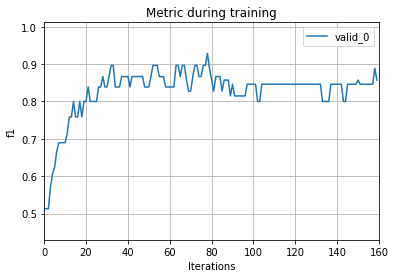

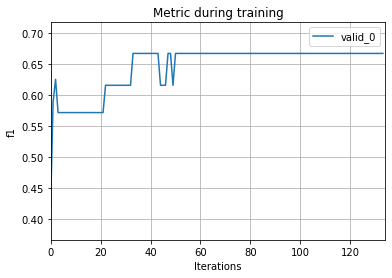

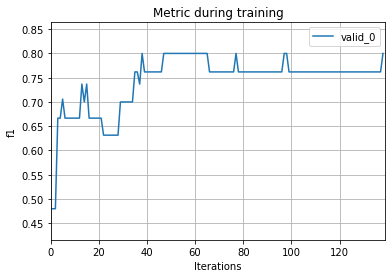

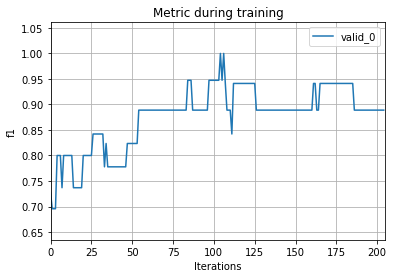

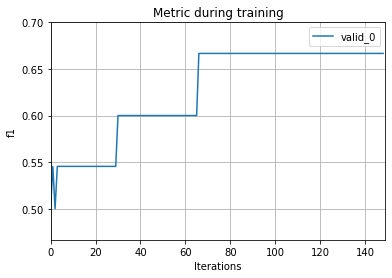

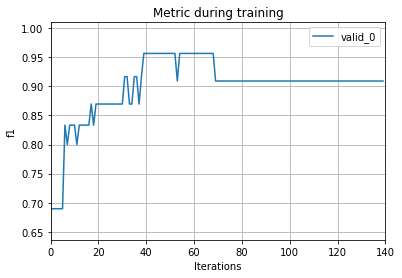

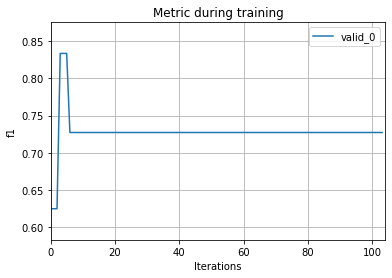

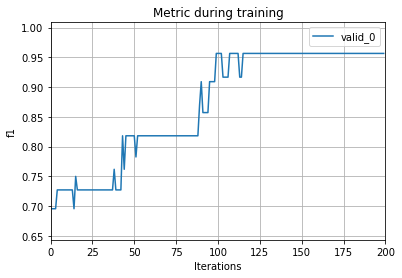

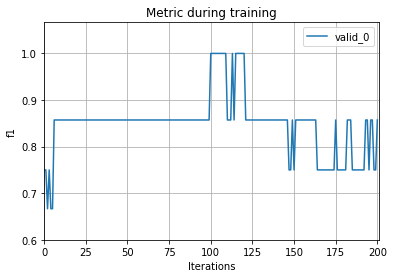

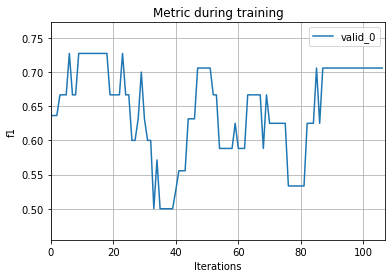

In [71]:
evals_result_smote = {}
list_models_smote = []

for data_set in list_fold:
    
    train_X = data_set[0][list(set(df_alpha.columns) - {'pp_longevity_10y'})]
    train_y = data_set[0][['pp_longevity_10y']].astype('int')

    val_X = data_set[1][list(set(df_alpha.columns) - {'pp_longevity_10y'})]
    val_y = data_set[1][['pp_longevity_10y']].astype('int')
    
    categorical_features = list(set(train_X.columns) - set(numeric_features))

    categorical_features_index = []
    for cat in categorical_features:
        categorical_features_index.append(list(train_X.columns).index(cat))
#     print(categorical_features_index)
    
    smote_nc = SMOTENC(categorical_features=categorical_features_index, random_state=123)
    X_resampled, y_resampled = smote_nc.fit_resample(train_X, train_y)
    
#     print(X_resampled.shape, y_resampled.shape)
#     print(y_resampled['pp_longevity_10y'].value_counts())
#     break
    
    train_ds = lgb.Dataset(X_resampled, label = y_resampled)
    valid_ds = lgb.Dataset(val_X, label = val_y)
    
    model = lgb.train(params, train_ds, 1000, valid_ds, verbose_eval=100, early_stopping_rounds=100, feval=lgb_f1_score, evals_result=evals_result_smote)
    lgb.plot_metric(evals_result_smote, metric='f1')
    
    list_models_smote.append(model)

In [72]:
f1_with_smote_stop_f1 = [0.83871, 0.666667, 0.8, 1, 0.6, 0.956522, 0.833333, 0.956522, 1, 0.727273]
print(sum(f1_with_smote_stop_f1)/len(f1_with_smote_stop_f1))
# 0.8427957000000001

0.8379026999999999


Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.0516809	valid_0's f1: 0.941176
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.0620237	valid_0's f1: 0.941176


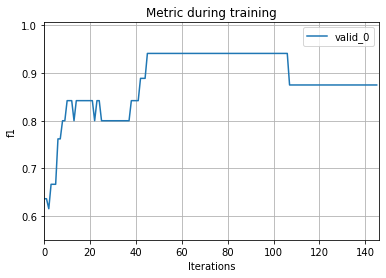

In [73]:
evals_result_smote_test = {}

# train_X = train_set[list(set(df_train.columns) - {'pp_longevity_10y'})]
# train_y = train_set[['pp_longevity_10y']].astype('int')

# val_X = test_set[list(set(df_train.columns) - {'pp_longevity_10y'})]
# val_y = test_set[['pp_longevity_10y']].astype('int')

categorical_features = list(set(train_X.columns) - set(numeric_features))

categorical_features_index = []
for cat in categorical_features:
    categorical_features_index.append(list(train_X.columns).index(cat))
#     print(categorical_features_index)

smote_nc = SMOTENC(categorical_features=categorical_features_index, random_state=123)
X_resampled, y_resampled = smote_nc.fit_resample(train_X, train_y)

#     print(X_resampled.shape, y_resampled.shape)
#     print(y_resampled['pp_longevity_10y'].value_counts())
#     break

train_ds = lgb.Dataset(X_resampled, label = y_resampled)
valid_ds = lgb.Dataset(test_X, label = test_y)

model = lgb.train(params, train_ds, 1000, valid_ds, verbose_eval=100, early_stopping_rounds=100, feval=lgb_f1_score, evals_result=evals_result_smote_test)
lgb.plot_metric(evals_result_smote_test, metric='f1')

# Train Model

In [14]:
import numpy as np
from sklearn.metrics import f1_score

In [15]:
params = {'learning_rate': 0.1, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'binary', 
#           'metric': ['auc','binary', 'poisson','auc_mu','kullback_leibler'], 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':123}

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

## Model_I

### Cross Validation

Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.0845907	valid_0's f1: 0.88
Early stopping, best iteration is:
[53]	valid_0's binary_logloss: 0.0713427	valid_0's f1: 0.88
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.140941	valid_0's f1: 0.666667
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.128801	valid_0's f1: 0.727273
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.0810881	valid_0's f1: 0.777778
Early stopping, best iteration is:
[48]	valid_0's binary_logloss: 0.0797176	valid_0's f1: 0.823529
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.0643278	valid_0's f1: 0.666667
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.0966832	valid_0's f1: 0.823529
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.0940734	va

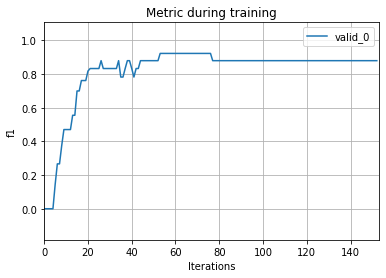

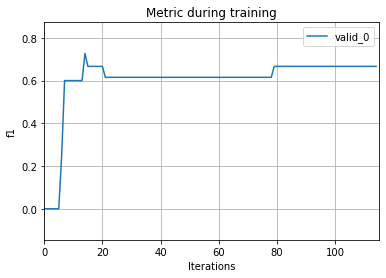

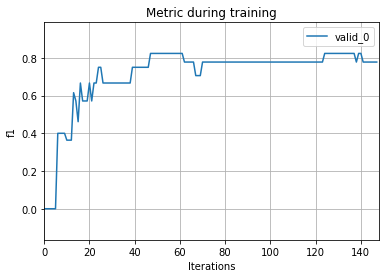

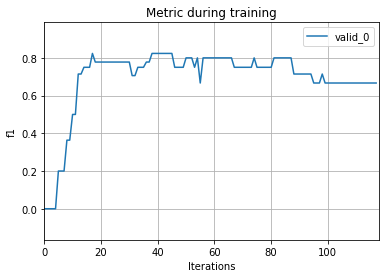

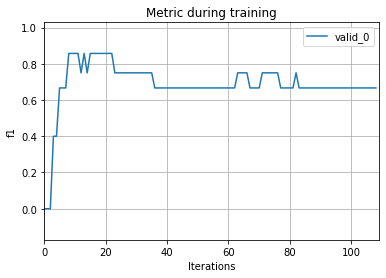

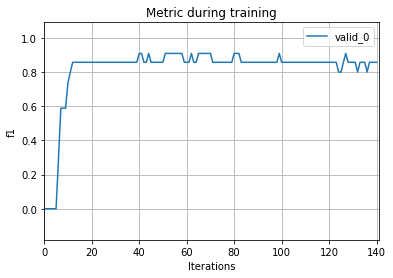

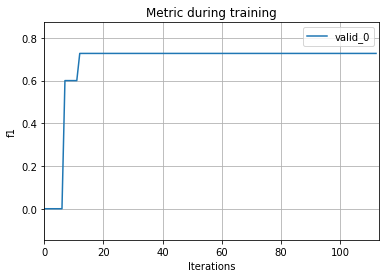

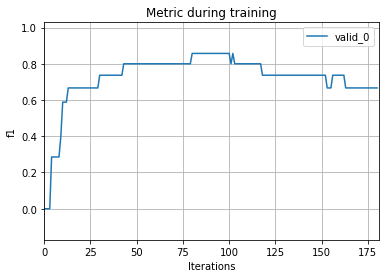

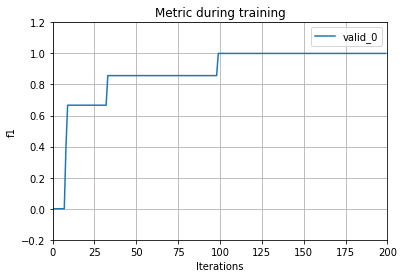

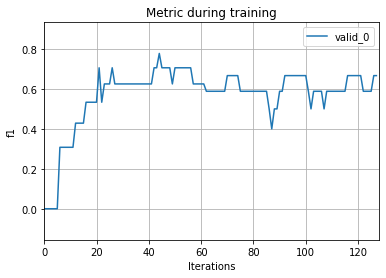

In [21]:
evals_result_without_os = {}
list_models = []

for data_set in list_fold:
    train_X = data_set[0][list(set(df_alpha.columns) - {'pp_longevity_10y'})]
    train_y = data_set[0][['pp_longevity_10y']].astype('int')

    val_X = data_set[1][list(set(df_alpha.columns) - {'pp_longevity_10y'})]
    val_y = data_set[1][['pp_longevity_10y']].astype('int')
    
    train_ds = lgb.Dataset(train_X, label = train_y)
    valid_ds = lgb.Dataset(val_X, label = val_y)
    
    model = lgb.train(params, train_ds, 1000, valid_ds, verbose_eval=100, early_stopping_rounds=100, feval=lgb_f1_score, evals_result=evals_result_without_os)
    lgb.plot_metric(evals_result_without_os, metric='f1')
    
    list_models.append(model)

In [17]:
f1_without_os_stop_f1 = [0.88, 0.727273, 0.823529, 0.823529, 0.857143, 0.909091, 0.727273, 0.857143, 1, 0.625]
print(sum(f1_without_os_stop_f1)/len(f1_without_os_stop_f1))
# 0.8229980999999998

0.8229980999999998


### Test

Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.113664	valid_0's f1: 0.8
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.111721	valid_0's f1: 0.8


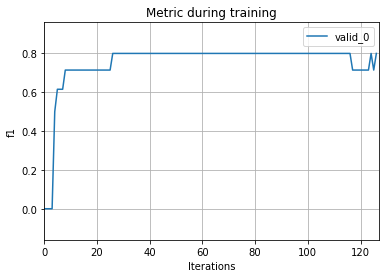

In [19]:
evals_result_without_os_test = {}
train_X = train_set[list(set(df_alpha.columns) - {'pp_longevity_10y'})]
train_y = train_set[['pp_longevity_10y']].astype('int')

test_X = test_set_list[0]
test_y = test_set_list[1].astype('int')

train_ds = lgb.Dataset(train_X, label = train_y)
test_ds = lgb.Dataset(test_X, label = test_y)

model_I = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100, feval=lgb_f1_score, evals_result=evals_result_without_os_test)
lgb.plot_metric(evals_result_without_os_test, metric='f1')


## Model_B

### Cross Validation

Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.160074	valid_0's f1: 0.8
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.204115	valid_0's f1: 0.83871
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.117047	valid_0's f1: 0.666667
Early stopping, best iteration is:
[62]	valid_0's binary_logloss: 0.122194	valid_0's f1: 0.666667
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.113428	valid_0's f1: 0.75
Early stopping, best iteration is:
[57]	valid_0's binary_logloss: 0.113909	valid_0's f1: 0.8
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.0740618	valid_0's f1: 0.8
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.153906	valid_0's f1: 0.842105
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.0480909	valid_0's f1: 0.8
E

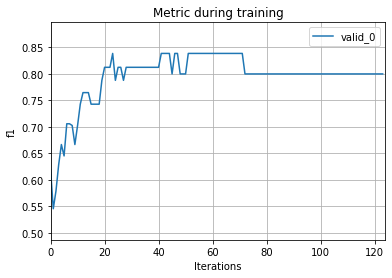

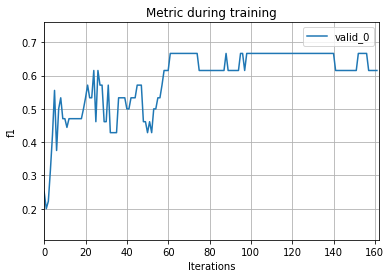

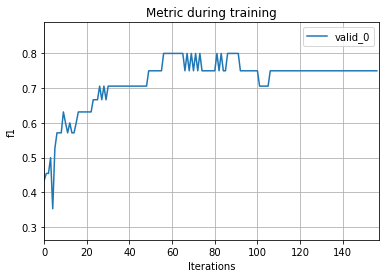

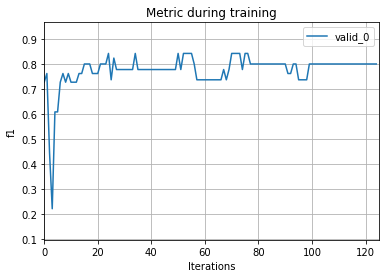

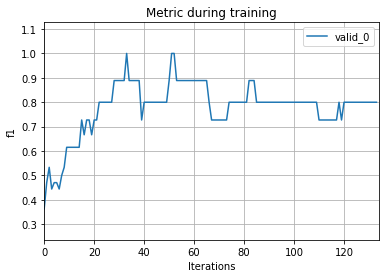

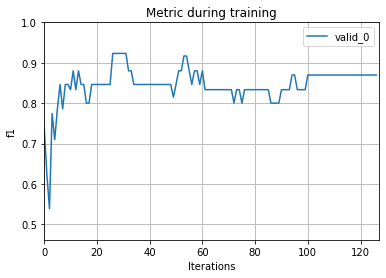

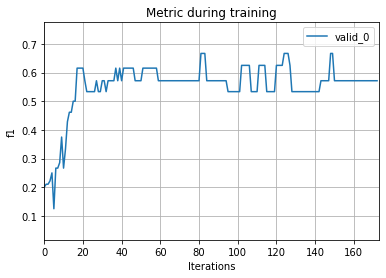

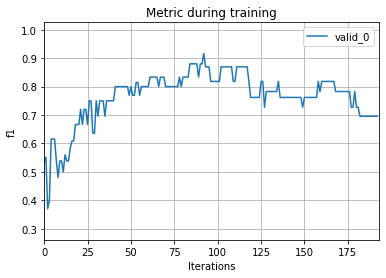

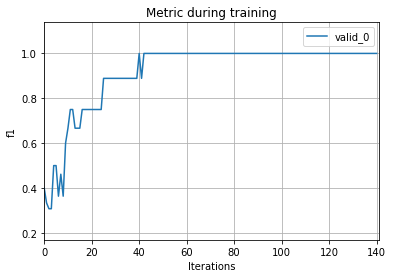

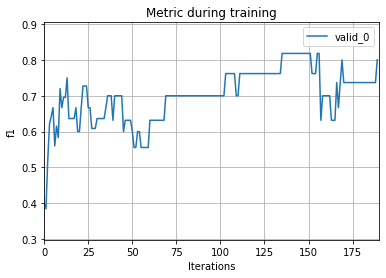

In [23]:
evals_result_ctgan = {}
list_models_ctgan = []

for data_set in list_fold:
    train_X = data_set[0][list(set(df_alpha.columns) - {'pp_longevity_10y'})]
    train_y = data_set[0][['pp_longevity_10y']].astype('int')

    val_X = data_set[1][list(set(df_alpha.columns) - {'pp_longevity_10y'})]
    val_y = data_set[1][['pp_longevity_10y']].astype('int')
        
    train_set = pd.concat([train_X, train_y], axis = 1)
    
    df_syn_sample = df_syn_1.sample(n=train_set['pp_longevity_10y'].value_counts()[0]-train_set['pp_longevity_10y'].value_counts()[1], random_state=123)

    train_set_ctgan = pd.concat([train_set, df_syn_sample])
#     print(train_set_ctgan['pp_longevity_10y'].value_counts())
    
    for c in categorical_features:
        train_set_ctgan[c] = train_set_ctgan[c].astype('category')
    
    train_X = train_set_ctgan[list(set(df_alpha.columns) - {'pp_longevity_10y'})]
    train_y = train_set_ctgan[['pp_longevity_10y']].astype('int')
    
#     display(val_X)
#     print(val_X.shape, val_y.shape)
#     break

    train_ds = lgb.Dataset(train_X, label = train_y)
    valid_ds = lgb.Dataset(val_X, label = val_y)

    model = lgb.train(params, train_ds, 1000, valid_ds, verbose_eval=100, early_stopping_rounds=100, feval=lgb_f1_score, evals_result=evals_result_ctgan)
    lgb.plot_metric(evals_result_ctgan, metric='f1')
    
    list_models_ctgan.append(model)

In [24]:
f1_with_ctgan_stop_f1 = [0.83871, 0.666667, 0.8, 0.842105, 1, 0.923077, 0.571429, 0.916667, 1, 0.7]
print(sum(f1_with_ctgan_stop_f1)/len(f1_with_ctgan_stop_f1))
# 0.8258655000000001

0.8258655000000001


Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.0631913	valid_0's f1: 0.888889
[200]	valid_0's binary_logloss: 0.0866749	valid_0's f1: 0.846154
Early stopping, best iteration is:
[109]	valid_0's binary_logloss: 0.0526423	valid_0's f1: 0.923077
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.129281	valid_0's f1: 0.666667
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.157652	valid_0's f1: 0.666667
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.0984076	valid_0's f1: 0.736842
[200]	valid_0's binary_logloss: 0.0986534	valid_0's f1: 0.823529
Early stopping, best iteration is:
[117]	valid_0's binary_logloss: 0.0924096	valid_0's f1: 0.823529
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.0785333	valid_0's f1: 0.823529
Early stopping, best iteration is:
[39]	valid_0's binary_logloss:

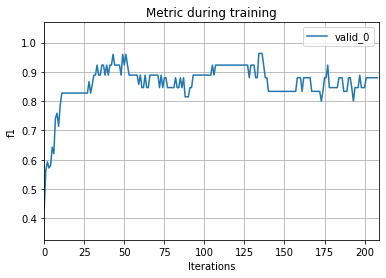

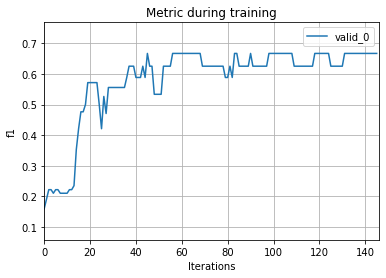

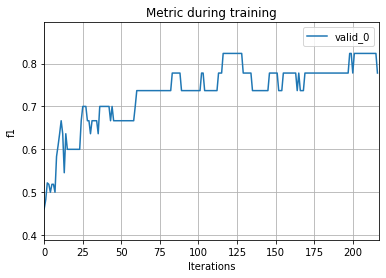

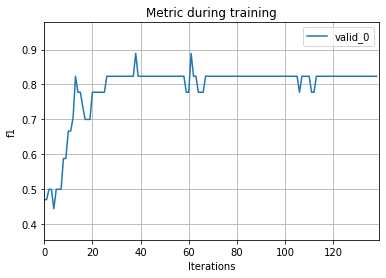

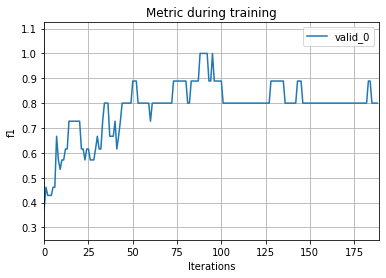

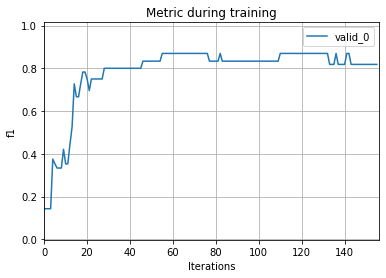

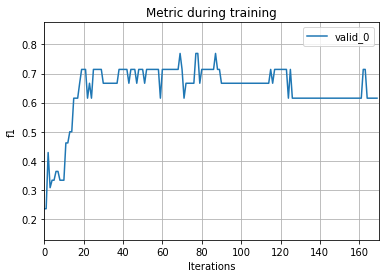

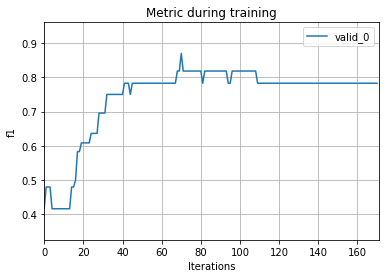

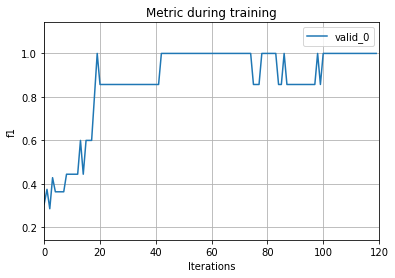

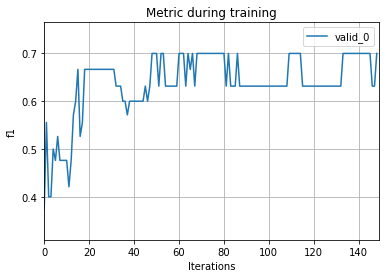

In [111]:
evals_result_ctgan = {}
list_models_ctgan = []
df_syn_sample_mk2 = df_syn_1_mk2.sample(n=train_set['pp_longevity_10y'].value_counts()[0]-train_set['pp_longevity_10y'].value_counts()[1], random_state=12345)

for data_set in list_fold:
    train_X = data_set[0][list(set(df_alpha.columns) - {'pp_longevity_10y'})]
    train_y = data_set[0][['pp_longevity_10y']].astype('int')

    val_X = data_set[1][list(set(df_alpha.columns) - {'pp_longevity_10y'})]
    val_y = data_set[1][['pp_longevity_10y']].astype('int')
        
    train_set = pd.concat([train_X, train_y], axis = 1)
    
    train_set_ctgan = pd.concat([train_set, df_syn_sample_mk2])
#     print(train_set_ctgan['pp_longevity_10y'].value_counts())
    
    for c in categorical_features:
        train_set_ctgan[c] = train_set_ctgan[c].astype('category')
    
    train_X = train_set_ctgan[list(set(df_alpha.columns) - {'pp_longevity_10y'})]
    train_y = train_set_ctgan[['pp_longevity_10y']].astype('int')
    
#     display(val_X)
#     print(val_X.shape, val_y.shape)
#     break

    train_ds = lgb.Dataset(train_X, label = train_y)
    valid_ds = lgb.Dataset(val_X, label = val_y)

    model = lgb.train(params, train_ds, 1000, valid_ds, verbose_eval=100, early_stopping_rounds=100, feval=lgb_f1_score, evals_result=evals_result_ctgan)
    lgb.plot_metric(evals_result_ctgan, metric='f1')
    
    list_models_ctgan.append(model)

In [112]:
f1_with_ctgan_stop_f1 = [0.923077, 0.666667, 0.823529, 0.888889, 1, 0.869565, 0.769231, 0.869565, 1, 0.7]
print(sum(f1_with_ctgan_stop_f1)/len(f1_with_ctgan_stop_f1))
# 0.8258655000000001

0.8510522999999999


### Test

1    938
0    938
Name: pp_longevity_10y, dtype: int64
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.10103	valid_0's f1: 0.777778
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.204612	valid_0's f1: 0.842105


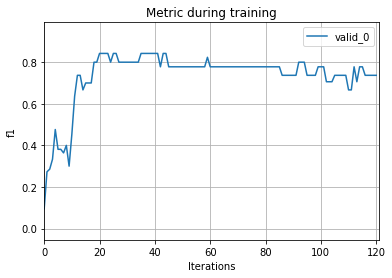

In [26]:
evals_result_ctgan_test = {}

df_syn_sample = df_syn_1.sample(n=train_set['pp_longevity_10y'].value_counts()[0]-train_set['pp_longevity_10y'].value_counts()[1], random_state=123)

train_set_ctgan = pd.concat([train_set, df_syn_sample])
print(train_set_ctgan['pp_longevity_10y'].value_counts())

for c in categorical_features:
    train_set_ctgan[c] = train_set_ctgan[c].astype('category')

train_X = train_set_ctgan[list(set(df_alpha.columns) - {'pp_longevity_10y'})]
train_y = train_set_ctgan[['pp_longevity_10y']].astype('int')

train_ds = lgb.Dataset(train_X, label = train_y)
valid_ds = lgb.Dataset(test_X, label = test_y)

model_B = lgb.train(params, train_ds, 1000, valid_ds, verbose_eval=100, early_stopping_rounds=100, feval=lgb_f1_score, evals_result=evals_result_ctgan_test)
lgb.plot_metric(evals_result_ctgan_test, metric='f1')

1    938
0    938
Name: pp_longevity_10y, dtype: int64
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.102524	valid_0's f1: 0.842105
Early stopping, best iteration is:
[85]	valid_0's binary_logloss: 0.0898266	valid_0's f1: 0.888889


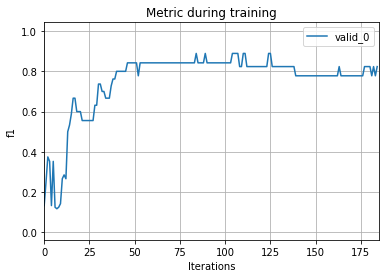

In [114]:
evals_result_ctgan_test = {}

# df_syn_sample = df_syn_1.sample(n=train_set['pp_longevity_10y'].value_counts()[0]-train_set['pp_longevity_10y'].value_counts()[1], random_state=12345)

train_set_ctgan = pd.concat([train_set, df_syn_sample_mk2])
print(train_set_ctgan['pp_longevity_10y'].value_counts())

for c in categorical_features:
    train_set_ctgan[c] = train_set_ctgan[c].astype('category')

train_X = train_set_ctgan[list(set(df_alpha.columns) - {'pp_longevity_10y'})]
train_y = train_set_ctgan[['pp_longevity_10y']].astype('int')

train_ds = lgb.Dataset(train_X, label = train_y)
valid_ds = lgb.Dataset(test_X, label = test_y)

model_B_mk2 = lgb.train(params, train_ds, 1000, valid_ds, verbose_eval=100, early_stopping_rounds=100, feval=lgb_f1_score, evals_result=evals_result_ctgan_test)
lgb.plot_metric(evals_result_ctgan_test, metric='f1')

# First Prediction

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [46]:
len(test_set_list[1])

113

In [56]:
prediction_I = model_I.predict(test_X)
list_predict_I = [round(x) for x in prediction_I]
corr_1_I = []
corr_0_I = []
incorr_1_I = []
incorr_0_I = []

for i, label in enumerate(test_set_list[1]):
    if label == 1 and label == list_predict_I[i]:
        corr_1_I.append(i)
    elif label == 0 and label == list_predict_I[i]:
        corr_0_I.append(i)
    elif label == 1 and label != list_predict_I[i]:
        incorr_0_I.append(i)
    elif label == 0 and label != list_predict_I[i]:
        incorr_1_I.append(i)

print(len(corr_1_I), len(corr_0_I), len(incorr_1_I), len(incorr_0_I))

6 104 0 3


In [63]:
print(incorr_1_I)
print(incorr_0_I)

[]
[0, 12, 15]


In [58]:
prediction_B = model_B.predict(test_X)
list_predict_B = [round(x) for x in prediction_B]
corr_1_B = []
corr_0_B = []
incorr_1_B = []
incorr_0_B = []

for i, label in enumerate(test_set_list[1]):
    if label == 1 and label == list_predict_B[i]:
        corr_1_B.append(i)
    elif label == 0 and label == list_predict_B[i]:
        corr_0_B.append(i)
    elif label == 1 and label != list_predict_B[i]:
        incorr_0_B.append(i)
    elif label == 0 and label != list_predict_B[i]:
        incorr_1_B.append(i)

print(len(corr_1_B), len(corr_0_B), len(incorr_1_B), len(incorr_0_B))

8 102 2 1


In [59]:
print(incorr_1_B)
print(incorr_0_B)

[1, 27]
[0]


In [115]:
prediction_B = model_B_mk2.predict(test_X)
list_predict_B = [round(x) for x in prediction_B]
corr_1_B = []
corr_0_B = []
incorr_1_B = []
incorr_0_B = []

for i, label in enumerate(test_set_list[1]):
    if label == 1 and label == list_predict_B[i]:
        corr_1_B.append(i)
    elif label == 0 and label == list_predict_B[i]:
        corr_0_B.append(i)
    elif label == 1 and label != list_predict_B[i]:
        incorr_0_B.append(i)
    elif label == 0 and label != list_predict_B[i]:
        incorr_1_B.append(i)

print(len(corr_1_B), len(corr_0_B), len(incorr_1_B), len(incorr_0_B))

print(incorr_1_B)
print(incorr_0_B)

8 103 1 1
[27]
[0]


In [128]:
prediction_B = model_B_mk2.predict_proba(test_X)

AttributeError: 'Booster' object has no attribute 'predict_proba'

## Next Prediction List

In [132]:
pred_1_I = corr_1_I + incorr_1_I
pred_1_B = corr_1_B + incorr_1_B
pred_0_I = corr_0_I + incorr_0_I
pred_0_B = corr_0_B + incorr_0_B

set_diff_pred_1 = set(pred_1_I) ^ set(pred_1_B)
set_diff_pred_0 = set(pred_0_I) ^ set(pred_0_B)

print(set_diff_pred_1, set_diff_pred_0)
print(set_diff_pred_1 & set_diff_pred_0)

print(len(set(pred_1_I) & set(pred_1_B)))
print(len(set(pred_0_I) & set(pred_0_B)))

{12, 15, 27} {12, 15, 27}
{27, 12, 15}
6
104


In [124]:
test_set_list[1].iloc[[27,12,15]]

278    0
155    1
177    1
Name: pp_longevity_10y, dtype: category
Categories (2, int64): [0, 1]

# Plot SHAP

In [75]:
import shap

## Plot Model_I

In [91]:
explainer_I = shap.TreeExplainer(model_I)
shap_values_I = explainer_I.shap_values(test_X)

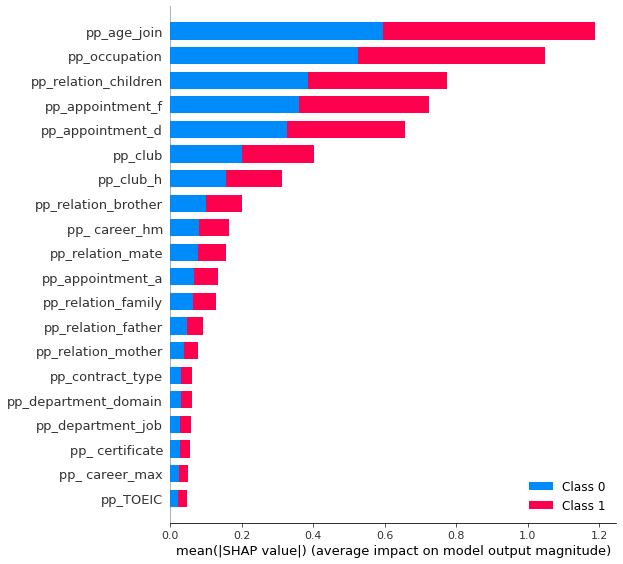

In [92]:
# %time shap_values = shap.TreeExplainer(model).shap_values(test_X)
shap.summary_plot(shap_values_I, test_X)

In [99]:
shap.initjs()
shap.force_plot(explainer_B.expected_value[1], shap_values_I[1][0,:], test_X.iloc[0,:])

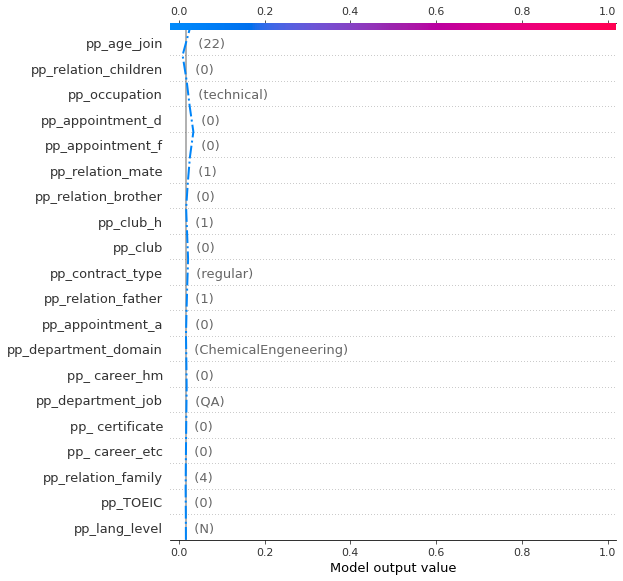

In [101]:
shap.decision_plot(explainer_I.expected_value[1], shap_values_I[1][0,:], test_X.iloc[0,:],
                   link='logit', highlight=0)

## Plot Model_B

In [95]:
explainer_B = shap.TreeExplainer(model_B)
shap_values_B = explainer_B.shap_values(test_X)

/anaconda3/lib/python3.6/site-packages/shap/explainers/tree.py:194: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


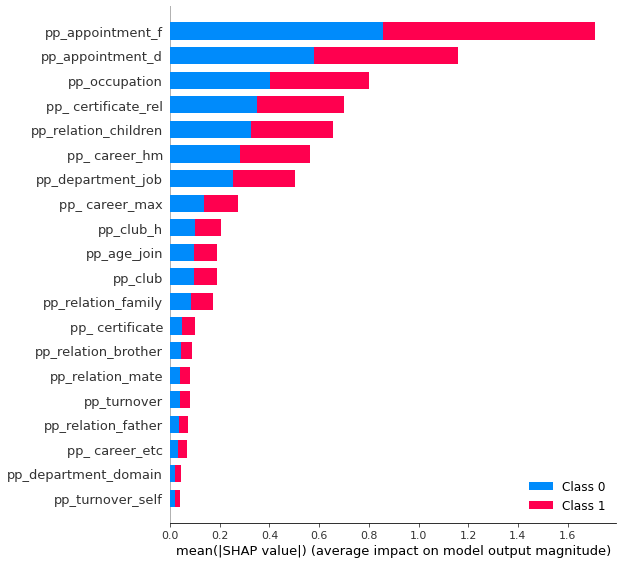

In [96]:
shap.summary_plot(shap_values_B, test_X)

In [100]:
shap.force_plot(explainer_B.expected_value[1], shap_values_B[1][0,:], test_X.iloc[0,:])

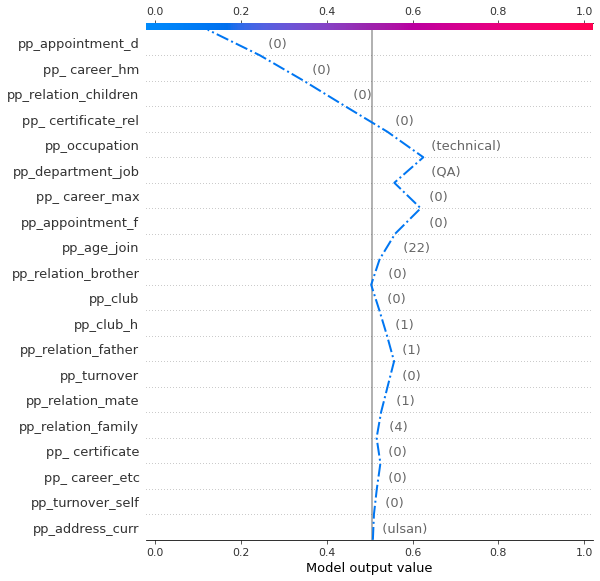

In [102]:
shap.decision_plot(explainer_B.expected_value[1], shap_values_B[1][0,:], test_X.iloc[0,:],
                   link='logit', highlight=0)

In [119]:
explainer_B = shap.TreeExplainer(model_B_mk2)
shap_values_B = explainer_B.shap_values(test_X)

/anaconda3/lib/python3.6/site-packages/shap/explainers/tree.py:194: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


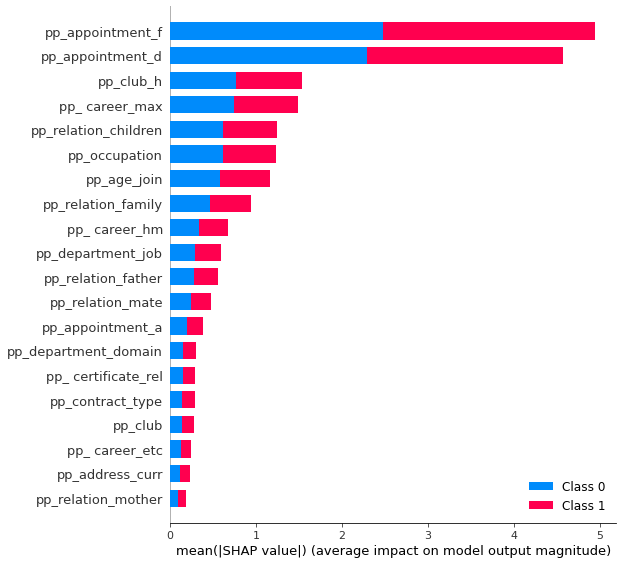

In [120]:
shap.summary_plot(shap_values_B, test_X)

In [121]:
shap.force_plot(explainer_B.expected_value[1], shap_values_B[1][0,:], test_X.iloc[0,:])

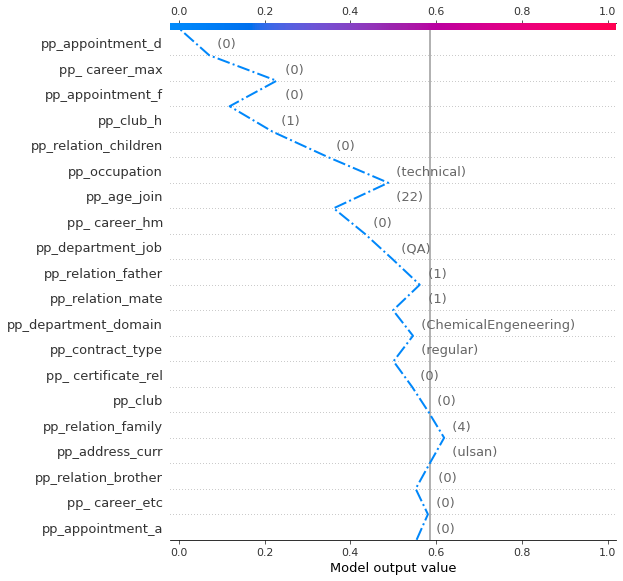

In [122]:
shap.decision_plot(explainer_B.expected_value[1], shap_values_B[1][0,:], test_X.iloc[0,:],
                   link='logit', highlight=0)